<a href="https://colab.research.google.com/github/MritulaC/GANs-Learning/blob/main/SimpleGANImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GAN Practice

URL: https://medium.com/analytics-vidhya/implementing-a-gan-in-keras-d6c36bc6ab5f

In [11]:
from tensorflow.keras.optimizers import Adam
import numpy as np

np.random.seed(10)

noise_dim = 100

batch_size = 16
steps_per_epoch = 3750
epochs = 10

save_path = 'fcgan-images'

img_rows, img_cols, channels = 28, 28, 1

optimizer = Adam(0.0002, 0.5)

In [12]:
from keras.datasets import mnist
import os

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = (x_train.astype(np.float32) - 127.5) / 127.5

x_train = x_train.reshape(-1, img_rows*img_cols*channels)


if not os.path.isdir(save_path):
    os.mkdir(save_path)

In [13]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.advanced_activations import LeakyReLU

def create_generator():
    generator = Sequential()
    
    generator.add(Dense(256, input_dim=noise_dim))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(1024))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(img_rows*img_cols*channels, activation='tanh'))
    
    generator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return generator

In [14]:
def create_discriminator():
    discriminator = Sequential()
     
    discriminator.add(Dense(1024, input_dim=img_rows*img_cols*channels))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(512))
    discriminator.add(LeakyReLU(0.2))

    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(0.2))
    
    discriminator.add(Dense(1, activation='sigmoid'))
    
    discriminator.compile(loss='binary_crossentropy', optimizer=optimizer)
    return discriminator

In [15]:
# Initializing discriminator and Generator
discriminator = create_discriminator()
generator = create_generator()

In [16]:
from keras.layers import Input
from keras.models import Model

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

Setting** "discriminator.trainable = False"**

In [18]:
from keras.layers import Input
from keras.models import Model

discriminator = create_discriminator()
generator = create_generator()

discriminator.trainable = False

gan_input = Input(shape=(noise_dim,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=optimizer)

In [19]:
noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
fake_x = generator.predict(noise)

In [20]:
real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]

In [21]:
x = np.concatenate((real_x, fake_x))

In [22]:
disc_y = np.zeros(2*batch_size)
disc_y[:batch_size] = 0.9

In [23]:
d_loss = discriminator.train_on_batch(x, disc_y)

In [24]:
y_gen = np.ones(batch_size)
g_loss = gan.train_on_batch(noise, y_gen)

In [26]:
for epoch in range(epochs):
    for batch in range(steps_per_epoch):
        noise = np.random.normal(0, 1, size=(batch_size, noise_dim))
        fake_x = generator.predict(noise)

        real_x = x_train[np.random.randint(0, x_train.shape[0], size=batch_size)]
        
        x = np.concatenate((real_x, fake_x))

        disc_y = np.zeros(2*batch_size)
        disc_y[:batch_size] = 0.9

        d_loss = discriminator.train_on_batch(x, disc_y)

        y_gen = np.ones(batch_size)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f'Epoch: {epoch} \t Discriminator Loss: {d_loss} \t\t Generator Loss: {g_loss}')

Epoch: 0 	 Discriminator Loss: 0.4800061583518982 		 Generator Loss: 1.7121819257736206
Epoch: 1 	 Discriminator Loss: 0.5843510627746582 		 Generator Loss: 1.334862470626831
Epoch: 2 	 Discriminator Loss: 0.6003420948982239 		 Generator Loss: 1.2868279218673706
Epoch: 3 	 Discriminator Loss: 0.530619740486145 		 Generator Loss: 1.4513201713562012
Epoch: 4 	 Discriminator Loss: 0.7086852788925171 		 Generator Loss: 1.3319683074951172
Epoch: 5 	 Discriminator Loss: 0.5401601791381836 		 Generator Loss: 1.5801376104354858
Epoch: 6 	 Discriminator Loss: 0.6098871231079102 		 Generator Loss: 1.3877742290496826
Epoch: 7 	 Discriminator Loss: 0.5713042616844177 		 Generator Loss: 1.531114101409912
Epoch: 8 	 Discriminator Loss: 0.5796792507171631 		 Generator Loss: 1.8971391916275024
Epoch: 9 	 Discriminator Loss: 0.5725937485694885 		 Generator Loss: 1.6420971155166626


In [27]:
import matplotlib.pyplot as plt

def show_images(noise):
    generated_images = generator.predict(noise)
    plt.figure(figsize=(10, 10))
    
    for i, image in enumerate(generated_images):
        plt.subplot(10, 10, i+1)
        if channels == 1:
            plt.imshow(image.reshape((img_rows, img_cols)), cmap='gray')
        else:
            plt.imshow(image.reshape((img_rows, img_cols, channels)))
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

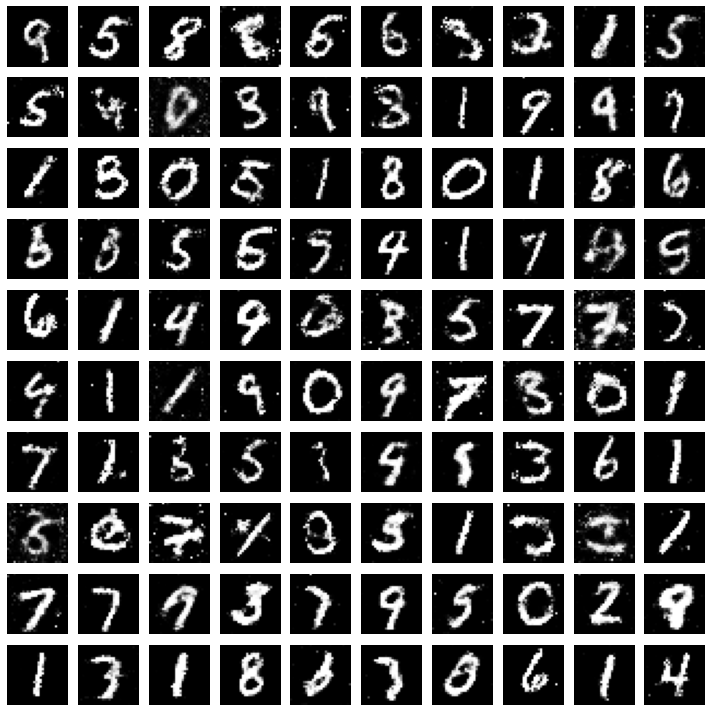

In [28]:
noise = np.random.normal(0, 1, size=(100, noise_dim))
show_images(noise)